## **1- Exploratory data analysis (EDA)**

In [316]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [317]:
url_data = '../data/flights_with_noise.csv'
SEED = 42

In [318]:
df = pd.read_csv(url_data)

In [319]:
df = df.sample(n=10000, random_state=SEED)

In [320]:
df.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
40337,13,NF,Embraer E175,non-schengen,NAF,16.049204,20.049204,134,2017,False,81.435087
9354,6,NF,Boeing 787,schengen,JXY,18.749539,20.749539,258,2011,False,57.113668
64321,6,NF,Boeing 787,schengen,JXY,18.749539,20.749539,273,2021,False,58.818421
24993,26,NF,Embraer E175,schengen,RAG,7.225066,10.225066,206,2014,False,26.794439
10688,3,NF,Boeing 737,schengen,NAF,10.826167,14.826167,347,2011,False,57.489024


In [321]:
df.shape

(10000, 11)

In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 40337 to 44260
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       10000 non-null  int64  
 1   airline         10000 non-null  object 
 2   aircraft_type   10000 non-null  object 
 3   schengen        10000 non-null  object 
 4   origin          10000 non-null  object 
 5   arrival_time    10000 non-null  float64
 6   departure_time  10000 non-null  float64
 7   day             10000 non-null  int64  
 8   year            10000 non-null  int64  
 9   is_holiday      10000 non-null  bool   
 10  delay           10000 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 869.1+ KB


In [323]:
df.nunique()

flight_id            30
airline               3
aircraft_type         6
schengen              2
origin                8
arrival_time         30
departure_time       30
day                 365
year                 13
is_holiday            2
delay             10000
dtype: int64

In [324]:
df['schengen'].unique()

array(['non-schengen', 'schengen'], dtype=object)

In [325]:
df['is_holiday'].unique()

array([False,  True])

## **2 - Data preprocessing**

In [326]:
df

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
40337,13,NF,Embraer E175,non-schengen,NAF,16.049204,20.049204,134,2017,False,81.435087
9354,6,NF,Boeing 787,schengen,JXY,18.749539,20.749539,258,2011,False,57.113668
64321,6,NF,Boeing 787,schengen,JXY,18.749539,20.749539,273,2021,False,58.818421
24993,26,NF,Embraer E175,schengen,RAG,7.225066,10.225066,206,2014,False,26.794439
10688,3,NF,Boeing 737,schengen,NAF,10.826167,14.826167,347,2011,False,57.489024
...,...,...,...,...,...,...,...,...,...,...,...
40080,27,FZ,Embraer E175,schengen,GOR,16.378751,19.378751,117,2017,False,-26.368518
40123,16,NF,Boeing 777,non-schengen,QDX,18.157686,20.157686,119,2017,False,54.280238
45488,13,NF,Embraer E175,non-schengen,NAF,16.049204,20.049204,112,2018,False,57.517573
30240,1,NF,Boeing 787,schengen,XGR,8.454051,10.454051,191,2015,False,24.596881


In [327]:
# Transforming the values of the "schengen" and "is_holiday" columns.
df['is_holiday'] = df['is_holiday'].map({False: 0, True: 1})
df['schengen'] = df['schengen'].map({'non-schengen': 0, 'schengen': 1})

In [328]:
df.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
40337,13,NF,Embraer E175,0,NAF,16.049204,20.049204,134,2017,0,81.435087
9354,6,NF,Boeing 787,1,JXY,18.749539,20.749539,258,2011,0,57.113668
64321,6,NF,Boeing 787,1,JXY,18.749539,20.749539,273,2021,0,58.818421
24993,26,NF,Embraer E175,1,RAG,7.225066,10.225066,206,2014,0,26.794439
10688,3,NF,Boeing 737,1,NAF,10.826167,14.826167,347,2011,0,57.489024


In [329]:
# List of categorical variables
categorical_vars = ['airline', 'aircraft_type', 'origin']

# one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_vars, dtype=int)

In [330]:
df_encoded.head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,airline_AN,airline_FZ,...,aircraft_type_Boeing 787,aircraft_type_Embraer E175,origin_GOR,origin_JQT,origin_JXY,origin_NAF,origin_QDX,origin_RAG,origin_TUB,origin_XGR
40337,13,0,16.049204,20.049204,134,2017,0,81.435087,0,0,...,0,1,0,0,0,1,0,0,0,0
9354,6,1,18.749539,20.749539,258,2011,0,57.113668,0,0,...,1,0,0,0,1,0,0,0,0,0
64321,6,1,18.749539,20.749539,273,2021,0,58.818421,0,0,...,1,0,0,0,1,0,0,0,0,0
24993,26,1,7.225066,10.225066,206,2014,0,26.794439,0,0,...,0,1,0,0,0,0,0,1,0,0
10688,3,1,10.826167,14.826167,347,2011,0,57.489024,0,0,...,0,0,0,0,0,1,0,0,0,0


In [331]:
df_encoded[['arrival_time', 'departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.976671
departure_time,0.976671,1.000000


## **3 - RandomForestRegressor model**

In [332]:
X = df_encoded.drop(['flight_id', 'departure_time', 'day', 'year', 'delay'], axis=1)
y = df_encoded['delay']

In [333]:
X.head()

,schengen,arrival_time,is_holiday,airline_AN,airline_FZ,airline_NF,aircraft_type_Airbus A320,aircraft_type_Airbus A330,aircraft_type_Boeing 737,aircraft_type_Boeing 777,aircraft_type_Boeing 787,aircraft_type_Embraer E175,origin_GOR,origin_JQT,origin_JXY,origin_NAF,origin_QDX,origin_RAG,origin_TUB,origin_XGR
40337,0,16.049204,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
9354,1,18.749539,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
64321,1,18.749539,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
24993,1,7.225066,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
10688,1,10.826167,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [334]:
y.head()

40337    81.435087
9354     57.113668
64321    58.818421
24993    26.794439
10688    57.489024
Name: delay, dtype: float64

In [335]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [336]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Training the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 522.2680446262773
Root Mean Squared Error: 22.853184562031554
Mean Absolute Error: 17.91186567644893
R-squared: 0.4866361845905367


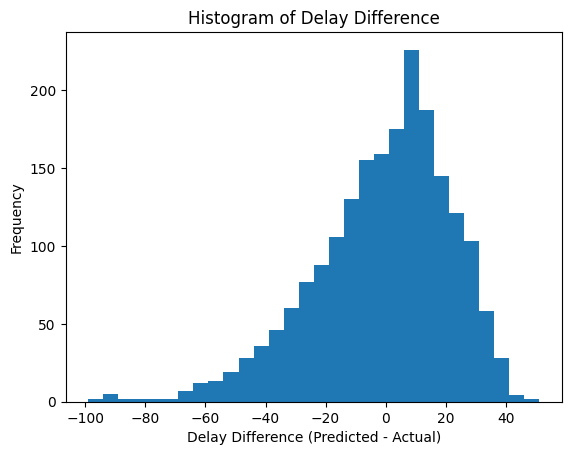

In [337]:
# Calculating the difference between predicted and actual delays.
delay_diff = y_pred - y_test

# Plotting a histogram of the delay difference
plt.hist(delay_diff, bins=30)
plt.xlabel("Delay Difference (Predicted - Actual)")
plt.ylabel("Frequency")
plt.title("Histogram of Delay Difference")
plt.show()

### **Creating a new feature: is_weekend**

In [338]:
#Creating a new feature: is_weekend
df_encoded['is_weekend'] = df_encoded['day'].apply(lambda day: day % 7 == 0 or day % 7 == 6)

In [339]:
df_encoded.head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,airline_AN,airline_FZ,...,aircraft_type_Embraer E175,origin_GOR,origin_JQT,origin_JXY,origin_NAF,origin_QDX,origin_RAG,origin_TUB,origin_XGR,is_weekend
40337,13,0,16.049204,20.049204,134,2017,0,81.435087,0,0,...,1,0,0,0,1,0,0,0,0,False
9354,6,1,18.749539,20.749539,258,2011,0,57.113668,0,0,...,0,0,0,1,0,0,0,0,0,True
64321,6,1,18.749539,20.749539,273,2021,0,58.818421,0,0,...,0,0,0,1,0,0,0,0,0,True
24993,26,1,7.225066,10.225066,206,2014,0,26.794439,0,0,...,1,0,0,0,0,0,1,0,0,False
10688,3,1,10.826167,14.826167,347,2011,0,57.489024,0,0,...,0,0,0,0,1,0,0,0,0,False


In [340]:
# Transforming 'False' and 'True' values into 0 and 1
df_encoded['is_weekend'] = df_encoded['is_weekend'].map({False: 0, True: 1})

In [341]:
df_encoded.head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,airline_AN,airline_FZ,...,aircraft_type_Embraer E175,origin_GOR,origin_JQT,origin_JXY,origin_NAF,origin_QDX,origin_RAG,origin_TUB,origin_XGR,is_weekend
40337,13,0,16.049204,20.049204,134,2017,0,81.435087,0,0,...,1,0,0,0,1,0,0,0,0,0
9354,6,1,18.749539,20.749539,258,2011,0,57.113668,0,0,...,0,0,0,1,0,0,0,0,0,1
64321,6,1,18.749539,20.749539,273,2021,0,58.818421,0,0,...,0,0,0,1,0,0,0,0,0,1
24993,26,1,7.225066,10.225066,206,2014,0,26.794439,0,0,...,1,0,0,0,0,0,1,0,0,0
10688,3,1,10.826167,14.826167,347,2011,0,57.489024,0,0,...,0,0,0,0,1,0,0,0,0,0


In [342]:
X = df_encoded.drop(['flight_id', 'departure_time', 'day', 'year', 'delay'], axis=1)
y = df_encoded['delay']

In [343]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [344]:
# Training the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 406.27476700147025
Root Mean Squared Error: 20.15625875507333
Mean Absolute Error: 15.381553842392126
R-squared: 0.6006518747634445


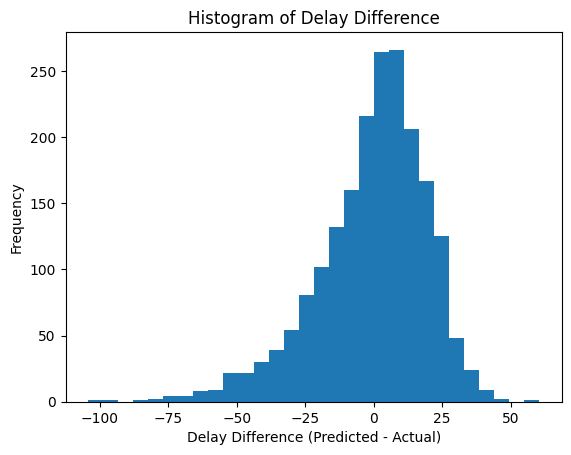

In [345]:
# Calculating the difference between predicted and actual delays
delay_diff = y_pred - y_test

# Plotting a histogram of the delay difference
plt.hist(delay_diff, bins=30)
plt.xlabel("Delay Difference (Predicted - Actual)")
plt.ylabel("Frequency")
plt.title("Histogram of Delay Difference")
plt.show()

In [346]:
import plotly.express as px

In [347]:
px.scatter(x = y_test, y = y_pred, trendline = 'ols', trendline_color_override = 'red',opacity = 0.2)

In [348]:
px.scatter(x = y_pred, y = (y_pred - y_test), trendline = 'ols', trendline_color_override = 'red',opacity = 0.2)

## **4 - Cross-validation**

In [349]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

# Defining the evaluation metrics
scoring = {
    'mae': make_scorer(mean_absolute_error),
    'mse': make_scorer(mean_squared_error),
    'rmse': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred))),
    'r2': make_scorer(r2_score)
}

# Performing cross-validation and calculating the metrics
cv_results = cross_validate(model, X, y, cv=5, scoring=scoring)

# Extracting the evaluation metrics
mse_scores = cv_results['test_mse']
rmse_scores = cv_results['test_rmse']
mae_scores = cv_results['test_mae']
r2_scores = cv_results['test_r2']

# Calculating the standard deviation of the metrics
mse_std = np.std(mse_scores)
rmse_std = np.std(rmse_scores)
mae_std = np.std(mae_scores)
r2_std = np.std(r2_scores)

# Printing the evaluation metrics and standard deviation
print(f"MSE Scores: {mse_scores}")
print(f"RMSE Scores: {rmse_scores}")
print(f"MAE Scores: {mae_scores}")
print(f"R2 Scores: {r2_scores}")
print('----------------------------------------------------------------')
print(f"MSE Mean: {mse_scores.mean()}, MSE Std: {mse_std}")
print(f"RMSE Mean: {rmse_scores.mean()}, RMSE Std: {rmse_std}")
print(f"MAE Mean: {mae_scores.mean()}, MAE Std: {mae_std}")
print(f"R2 Mean: {r2_scores.mean()}, R2 Std: {r2_std}")

MSE Scores: [390.88463606 406.17037978 382.38695849 374.64403786 358.99792944]
RMSE Scores: [19.77080262 20.15366914 19.55471704 19.35572365 18.94724068]
MAE Scores: [15.09423169 15.48623655 15.09385377 14.90746047 14.64546456]
R2 Scores: [0.60677835 0.58980766 0.59817522 0.60269868 0.62136119]
----------------------------------------------------------------
MSE Mean: 382.6167883265209, MSE Std: 15.777179997360863
RMSE Mean: 19.556430624345005, RMSE Std: 0.4034966687618847
MAE Mean: 15.045449408068572, MAE Std: 0.2749708436274645
R2 Mean: 0.6037642203223574, R2 Std: 0.01044888789740774


### **Feature importance**

In [350]:
# Getting the feature importances
feature_importance = model.feature_importances_

# Creating a DataFrame to visualize the feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Displaying the feature importances
feature_importance_df

,Feature,Importance
4,airline_FZ,0.544853
20,is_weekend,0.168354
2,is_holiday,0.080453
8,aircraft_type_Boeing 737,0.060923
19,origin_XGR,0.031048
1,arrival_time,0.027220
11,aircraft_type_Embraer E175,0.017000
6,aircraft_type_Airbus A320,0.015596
9,aircraft_type_Boeing 777,0.009327
0,schengen,0.008065


## **5 - Hyperparameters**

In [351]:
# Print the model parameters
params = model.get_params()
for param, value in params.items():
    print(f"{param}: {value}")

bootstrap: True
ccp_alpha: 0.0
criterion: squared_error
max_depth: None
max_features: 1.0
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 100
n_jobs: None
oob_score: False
random_state: None
verbose: 0
warm_start: False


In [352]:
from sklearn.model_selection import GridSearchCV

def grid_search_cv(parameters, model, X_train, y_train):

  # Defining the model and which parameters will be tuned
  model_grid = GridSearchCV(model, param_grid=parameters, cv=5, scoring='neg_mean_absolute_error')

  # Training
  model_grid.fit(X_train, y_train)

  # Obtaining the best values for each parameter
  best_params = model_grid.best_params_

  return best_params

In [353]:
# Defining the hyperparameters to be optimized
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1,2,3]
}

modelo_rf = RandomForestRegressor(random_state=SEED)

In [354]:
# comentei pq ela demora muito, mas é só descomentar para rodar
# grid_search_cv(param_grid, modelo_rf, X_train, y_train)

In [355]:
# Training the model
model = RandomForestRegressor(random_state=SEED, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=300)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 404.9365067587119
Root Mean Squared Error: 20.12303423340307
Mean Absolute Error: 15.364233527201012
R-squared: 0.6019673187989394


**Before optimization:**

- Mean Squared Error: 69.07698110323099
- Root Mean Squared Error: 8.311256289107622
- Mean Absolute Error: 6.04707479745361
- R-squared: 0.8693386014068234

### **Gradient Boosting Regressor**

In [356]:
from sklearn.ensemble import GradientBoostingRegressor

In [357]:
# Training the model
model_boosting = GradientBoostingRegressor()
model_boosting.fit(X_train, y_train)

# Making predictions
y_pred = model_boosting.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 402.59977514506073
Root Mean Squared Error: 20.0648891136996
Mean Absolute Error: 15.325153406166205
R-squared: 0.6042642111114498


In [358]:
# Defining the hyperparameters to test
parameters = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5]
}
modelo_boosting = GradientBoostingRegressor(random_state=SEED)

In [359]:
# grid_search_cv(parameters, modelo_boosting, X_train, y_train)

In [360]:
# Training the model
model_boosting = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=200)
model_boosting.fit(X_train, y_train)

# Making predictions
y_pred = model_boosting.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 403.39777612056764
Root Mean Squared Error: 20.08476477633153
Mean Absolute Error: 15.337050967757662
R-squared: 0.6034798153788334
